<a href="https://colab.research.google.com/github/tamonwan-skp/Loan_Prediction_NN/blob/main/Loan_Preprocessing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#STEP 1 : Loan Data Pre-processing
<ol>1.1 Filling the missing data
<ol>1.1.1 Filling in categorical data (mode)</ol>
<ol>1.1.2 Filling in the numerical data (mean/mediun)</ol></ol>
<ol>1.2 Tranform Data (Categories to Number)</ol>
<ol>1.3 Normalization


In [ ]:
import pandas as pd

In [ ]:
print(pd.__version__)

1.1.2


In [ ]:
#read load data file
df = pd.read_csv('loan_data.csv')

In [ ]:
#show first five data
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#find missing values in every columns
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## 1.1 Filling the missing values

#### 1.1.1 Filling in categorical data (mode)

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True) 
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)   
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

#### 1.1.2 Filling in the numerical data (mean/mediun)

In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## 1.2 Transform categorical data to number using End-coding technique 

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Married'] = df['Married'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'0': 0, '1': 1, '2':2, '3+':3})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'No':0, 'Yes':1})
df['Property_Area'] = df['Property_Area'].map({'Rural' : 0, 'Semiurban' : 1, 'Urban': 2})
df['Loan_Status'] = df['Loan_Status'].map({'N' : 0, 'Y' : 1})

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [ ]:
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

## 1.3 Normalization method for bringing all data in range 0 to 1

In [ ]:
# For example 
# bringing 'Dependents' data in the range 0 to 1
df['Dependents'] = (df['Dependents']- df['Dependents'].min())/(df['Dependents'].max() - df['Dependents'].min())

In [ ]:
#For all data

for col in df.columns[1:]:
    df[col] = (df[col] - df[col].min())/(df[col].max() - df[col].min())

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [ ]:
# Save to csv file
df.to_csv('loan_pre-processed_data.csv', index = False)

# STEP 2 : to build a Neural Network using Keras

<ol>2.1 Loading the dataset and libralies</ol>
<ol>2.2 Creating training and validation set</ol>
<ol>2.3 Defining the architecture of the model</ol>
<ol>2.4 Compiling the model (defining loss function, optimizer)</ol>
<ol>2.5 Training the model</ol>
<ol>2.6 Evaluating model performance on training and validation set</ol>

## 2.1 Loading the dataset and libralies

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import keras
# importing the sequential model
from keras.models import Sequential
# import different layers from keras
from keras.layers import InputLayer, Dense

import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
print(sklearn.__version__)

0.22.2.post1


In [ ]:
data = pd.read_csv('loan_pre-processed_data.csv')

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [ ]:
# checking missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# checking the data type
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [ ]:
data = data.drop('Loan_ID', axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(12)
memory usage: 57.7 KB


In [ ]:
#Separating the independent and dependent variables

# storing all independent variables as X
X = data.drop('Loan_Status', axis=1)

# storing the dependent variable as y
y = data['Loan_Status']

In [ ]:
X.shape

(614, 11)

In [ ]:
y.shape

(614,)

## 2.2 Creating training and validation set

In [ ]:
# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify= data['Loan_Status'], random_state= 10, test_size = 0.2) 

In [ ]:
X_train.shape, y_train.shape

((491, 11), (491,))

In [ ]:
X_test.shape, y_test.shape

((123, 11), (123,))

## 2.3 Definding the architecture of the model

In [ ]:
keras.__version__

'2.3.1'

In [ ]:
tf.__version__

'1.15.2'

#### 2.3.1 Create a model


<img src='https://drive.google.com/uc?id=1iZNZ3kwSHRNf-Irn3DZmMuBb6K-Lro7w'>

#### 2.3.2 Defining different layers
<ol>- input layer</ol>
<ol>- output layer</ol>
<ol>- hidden layer</ol>



In [ ]:
# number of input neurons
# X_train.shape
# number of features in the data
# X_train.shape[1]
# defining input neurons
input_neurons = X_train.shape[1]


In [ ]:
# number of output neuron
# since Loan prediction is a binary classification problem, the output layer will be only one neuron
output_neuron = 1

In [ ]:
# number of hidden layer
# It is a hyperparameter and we can pick the hidden layers and hidden neurons on our own
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

#### 2.3.4 Defining activation function of different layers

<ol> - Using relu as an activation function for hidden layers, you can change it as well</ol>
<ol> - Since it is a binary classification problem, I have used sigmoid activation function in the final layer

In [ ]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neuron, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
# summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# number of parameters between input and first hidden layer

input_neurons*neuron_hidden_layer_1

110

In [ ]:
# number of parameters between input and first hidden layer

# adding the bias for each neuron of first hidden layer

input_neurons*neuron_hidden_layer_1 + 10

120

In [ ]:
# number of parameters between first and second hidden layer

neuron_hidden_layer_1*neuron_hidden_layer_2 + 5

55

In [ ]:
# number of parameters between second hidden and output layer

neuron_hidden_layer_2*output_neuron + 1

6

## 2.4 Compiling the model (Defining loss function and optimizer)

In [ ]:
# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


##2.5 Training the model

In [ ]:
# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)


Train on 491 samples, validate on 123 samples
Epoch 1/50
491/491 [==============================] - 0s 855us/step - loss: 0.6363 - accuracy: 0.6864 - val_loss: 0.6283 - val_accuracy: 0.6992
Epoch 2/50
491/491 [==============================] - 0s 66us/step - loss: 0.6250 - accuracy: 0.6864 - val_loss: 0.6197 - val_accuracy: 0.6992
Epoch 3/50
491/491 [==============================] - 0s 69us/step - loss: 0.6180 - accuracy: 0.6884 - val_loss: 0.6150 - val_accuracy: 0.6992
Epoch 4/50
491/491 [==============================] - 0s 59us/step - loss: 0.6127 - accuracy: 0.6884 - val_loss: 0.6114 - val_accuracy: 0.7073
Epoch 5/50
491/491 [==============================] - 0s 58us/step - loss: 0.6089 - accuracy: 0.6884 - val_loss: 0.6068 - val_accuracy: 0.7073
Epoch 6/50
491/491 [==============================] - 0s 61us/step - loss: 0.6036 - accuracy: 0.6945 - val_loss: 0.6029 - val_accuracy: 0.6992
Epoch 7/50
491/491 [==============================] - 0s 63us/step - loss: 0.5978 - accuracy: 

## 2.6 Evaluating model performance in validation set

In [ ]:
# getting predictions for the validation set
prediction = model.predict_classes(X_test)

In [ ]:
# calculating the accuracy on validation set
accuracy_score(y_test, prediction)

0.8130081300813008

#### 2.6.1 Visualizing the model performance

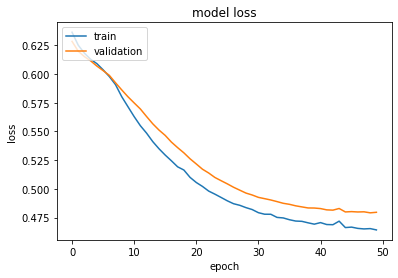

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

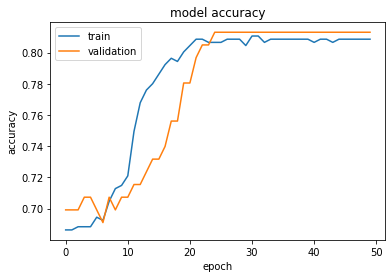

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc= 'upper left')
plt.show()